In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

import statsmodels.api as sm

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,8
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_excel('Pricefileproduct.xlsx')

In [3]:
df.head()

,date,price
0,2020-04-02,2.288894
1,2020-04-09,2.303788
2,2020-04-16,2.248494
3,2020-04-23,2.172472
4,2020-04-30,2.104264


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    116 non-null    datetime64[ns]
 1   price   116 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [5]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
dfi = df.set_index(['date'])
dfi

,price
date,
2020-04-02,2.288894
2020-04-09,2.303788
2020-04-16,2.248494
2020-04-23,2.172472
2020-04-30,2.104264
...,...
2022-07-07,5.503180
2022-07-14,5.351966
2022-07-22,4.954156


In [6]:
dfi.describe()

,price
count,116.000000
mean,4.640324
std,1.762244
min,2.005160
25%,3.451936
50%,4.461367
75%,6.252516
max,7.523157


In [7]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2020-04-02 to 2022-08-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   116 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


In [8]:
ndiffs(dfi.price, test='adf')

2

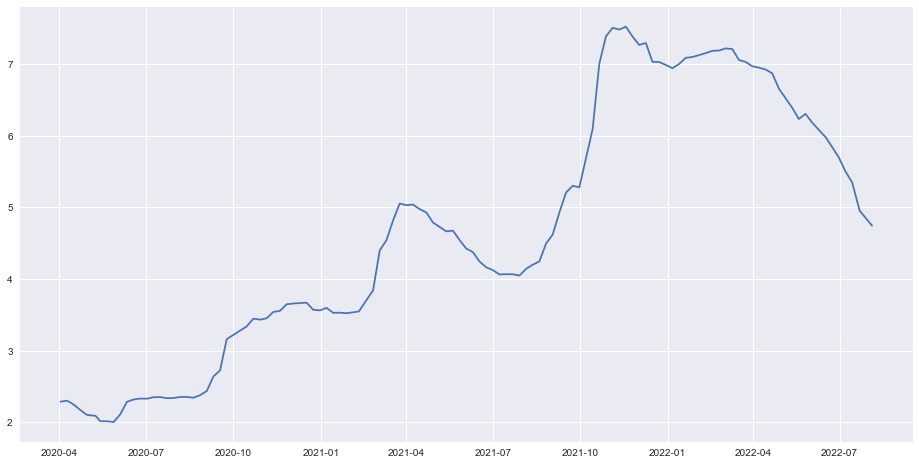

In [9]:
plt.plot(dfi)
plt.show()

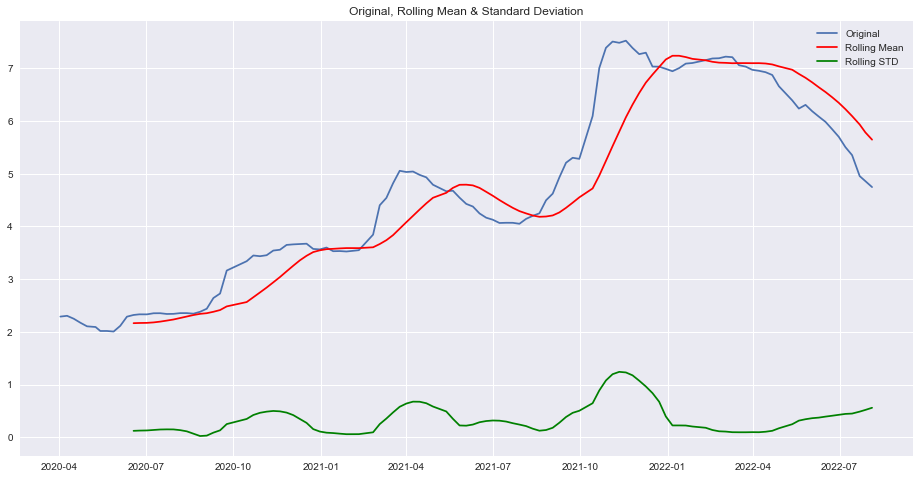

In [10]:
rmean = dfi.rolling(window=12).mean()
rstd = dfi.rolling(window=12).std()
plt.plot(dfi, label='Original')
plt.plot(rmean, color='r', label='Rolling Mean')
plt.plot(rstd, color='g', label='Rolling STD')
plt.title('Original, Rolling Mean & Standard Deviation')
plt.legend()
plt.show()

In [11]:
print('Results of Dickey-Fuller Test:')
dfitst = adfuller(dfi, autolag='AIC')
dfiop = pd.Series(dfitst[0:4], index=['Test Statistic:', 'p-value:', '#Lags Used:', '#Datapoints Used:'])

for key,value in dfitst[4].items():
    dfiop['Critical Value (%s)'%key] = value

print(dfiop)

Results of Dickey-Fuller Test:
Test Statistic:          -1.523130
p-value:                  0.522040
#Lags Used:               1.000000
#Datapoints Used:       114.000000
Critical Value (1%)      -3.489058
Critical Value (5%)      -2.887246
Critical Value (10%)     -2.580481
dtype: float64


In [12]:
dfi['Diff Once'] = dfi['price'] - dfi['price'].shift(1)
dfi['Diff Three'] = dfi['price'] - dfi['price'].shift(3)
dfi.head()

,price,Diff Once,Diff Three
date,,,
2020-04-02,2.288894,NaN,NaN
2020-04-09,2.303788,0.014895,NaN
2020-04-16,2.248494,-0.055294,NaN
2020-04-23,2.172472,-0.076022,-0.116422
2020-04-30,2.104264,-0.068208,-0.199524


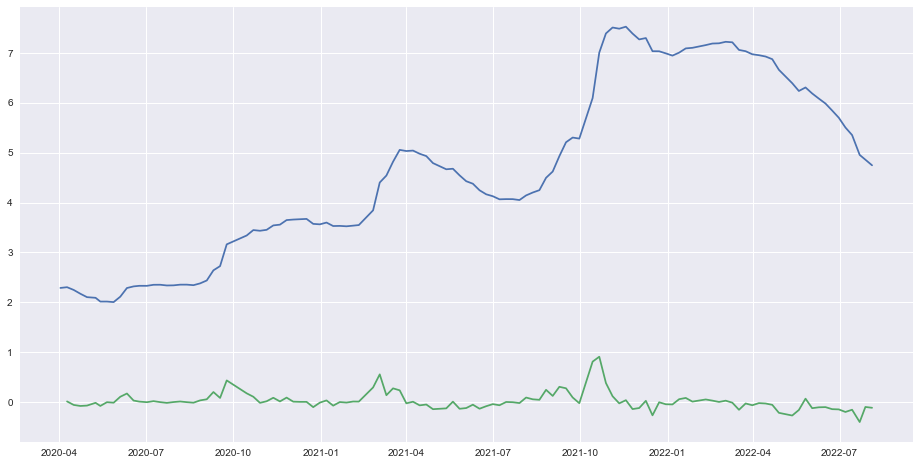

In [13]:
plt.plot(dfi[['price','Diff Once']])
plt.show()

In [14]:
print('Results of Dickey-Fuller Test:')
dfitst = adfuller(dfi['Diff Once'].dropna(), autolag='AIC')
dfiop = pd.Series(dfitst[0:4], index=['Test Statistic:', 'p-value:', '#Lags Used:', '#Datapoints Used:'])

for key,value in dfitst[4].items():
    dfiop['Critical Value (%s)'%key] = value

print(dfiop)

Results of Dickey-Fuller Test:
Test Statistic:          -5.048512
p-value:                  0.000018
#Lags Used:               0.000000
#Datapoints Used:       114.000000
Critical Value (1%)      -3.489058
Critical Value (5%)      -2.887246
Critical Value (10%)     -2.580481
dtype: float64


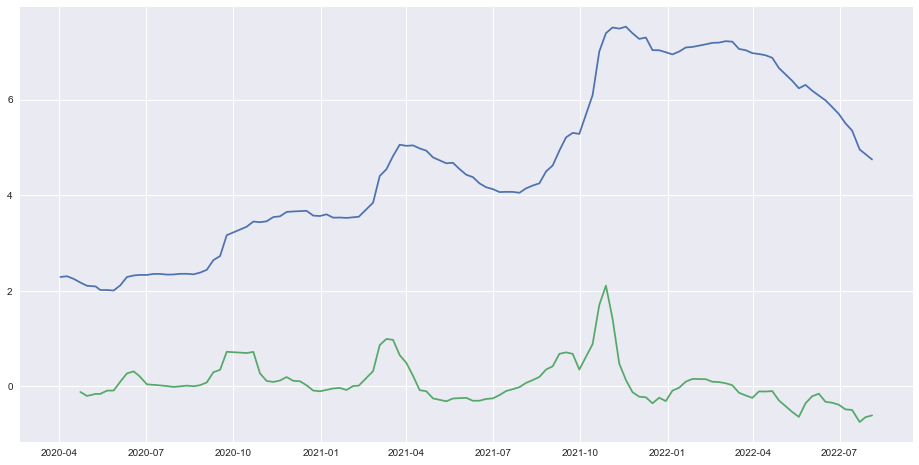

In [15]:
plt.plot(dfi[['price','Diff Three']])
plt.show()

In [16]:
print('Results of Dickey-Fuller Test:')
dfitst = adfuller(dfi['Diff Three'].dropna(), autolag='AIC')
dfiop = pd.Series(dfitst[0:4], index=['Test Statistic:', 'p-value:', '#Lags Used:', '#Datapoints Used:'])

for key,value in dfitst[4].items():
    dfiop['Critical Value (%s)'%key] = value

print(dfiop)

Results of Dickey-Fuller Test:
Test Statistic:          -3.282730
p-value:                  0.015668
#Lags Used:               4.000000
#Datapoints Used:       108.000000
Critical Value (1%)      -3.492401
Critical Value (5%)      -2.888697
Critical Value (10%)     -2.581255
dtype: float64


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

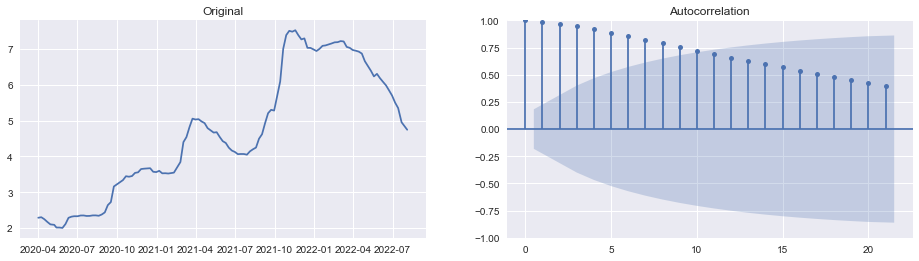

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(dfi['price'])
ax1.set_title('Original')
plot_acf(dfi['price'], ax=ax2);

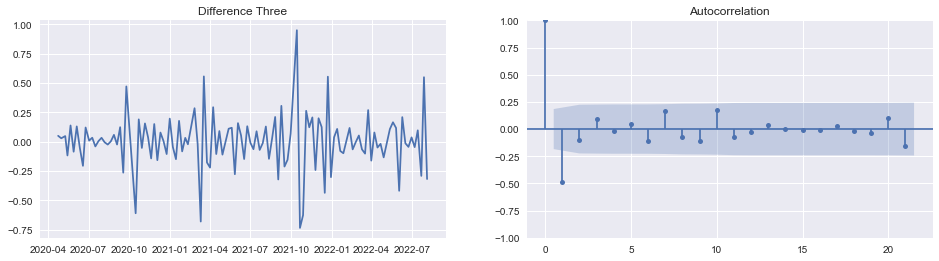

In [19]:
dfi3=dfi.price.diff().diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(dfi3)
ax1.set_title('Difference Three')
plot_acf(dfi3, ax=ax2);

C:\Users\chetank\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


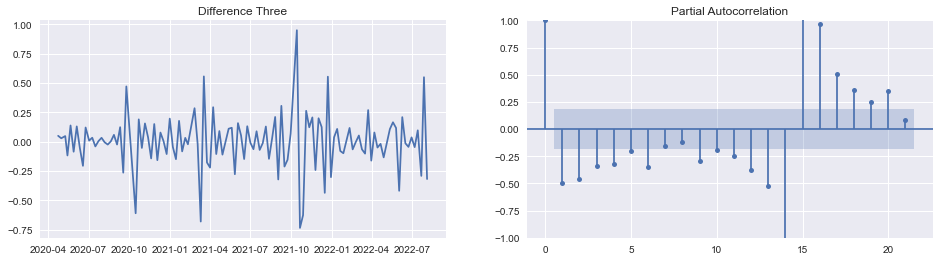

In [20]:
dfi3=dfi.price.diff().diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))

ax1.plot(dfi3)
ax1.set_title('Difference Three')
ax2.set_ylim(0,1)
plot_pacf(dfi3, ax=ax2);

In [30]:
mod = sm.tsa.statespace.SARIMAX(dfi.price,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\chetank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\chetank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  116
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -1252.414
Date:                            Thu, 18 Aug 2022   AIC                           2514.828
Time:                                    15:15:26   BIC                           2525.700
Sample:                                         0   HQIC                          2519.118
                                            - 116                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6191         -0       -inf      0.000       0.619       0.619
ma.L1         -0.0103         -0   

C:\Users\chetank\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\chetank\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2979: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


(array([0.0512165 , 0.0512165 , 0.69142271, 1.99744337, 0.10243299,
        0.0512165 , 0.        , 0.        , 0.        , 0.02560825]),
 array([-1.07747866, -0.74084144, -0.40420421, -0.06756699,  0.26907024,
         0.60570746,  0.94234468,  1.27898191,  1.61561913,  1.95225636,
         2.28889358]),
 <BarContainer object of 10 artists>)

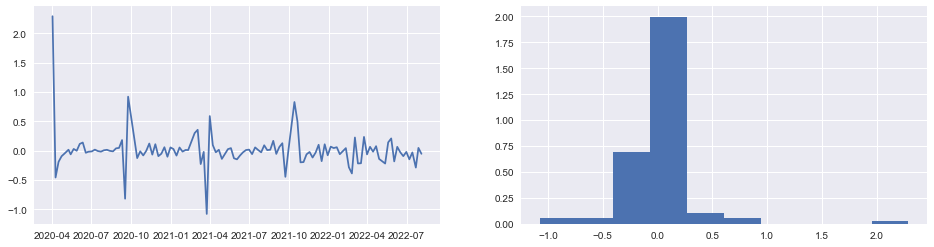

In [31]:
# Plot residual Errors
residuals = pd.DataFrame(results.resid)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [32]:
#Acutal vs Fitted

results.predict()

date
2020-04-02    0.000000
2020-04-09    2.761233
2020-04-16    2.438567
2020-04-23    2.267427
2020-04-30    2.152006
                ...   
2022-07-07    5.650591
2022-07-14    5.382414
2022-07-22    5.242552
2022-07-28    4.811429
2022-08-04    4.799773
Name: predicted_mean, Length: 116, dtype: float64

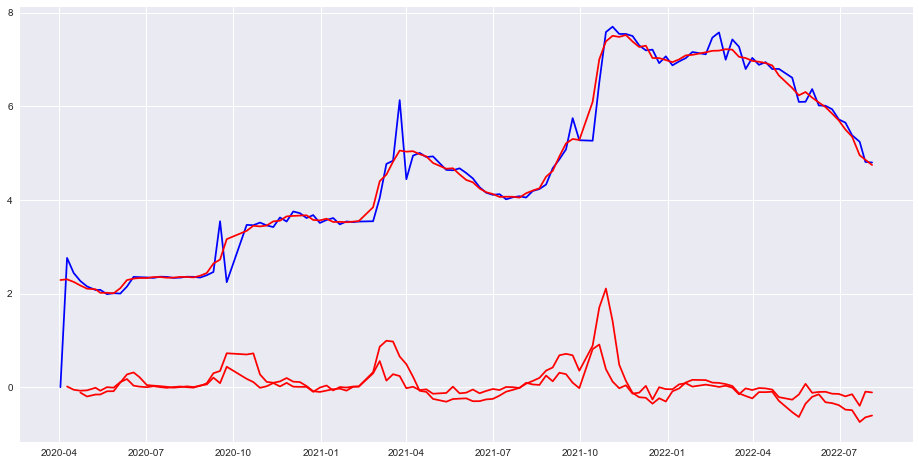

In [33]:
prediction = results.predict()
plt.plot(prediction, color='blue')
plt.plot(dfi, color='red')

C:\Users\chetank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\chetank\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\chetank\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


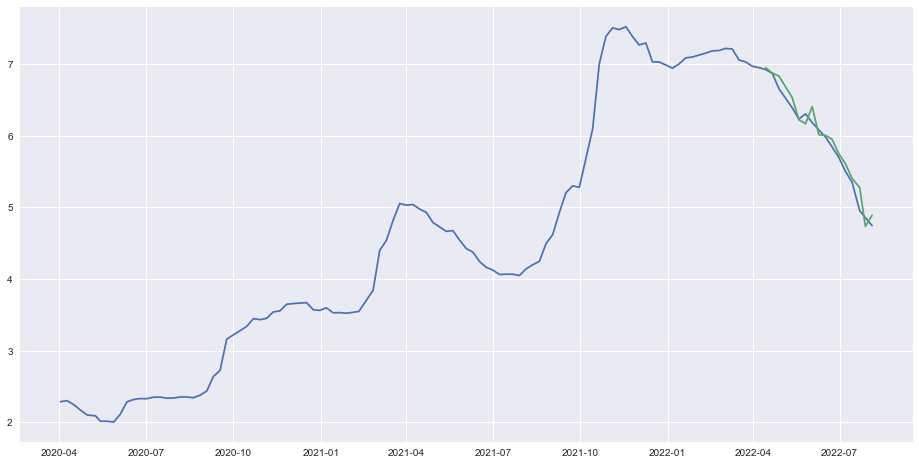

In [38]:
model = sm.tsa.statespace.SARIMAX(dfi['price'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 24))
results = model.fit()
dfi['fcast'] = results.predict(start=100, end=115, dynamic=False)
plt.plot(dfi[['price','fcast']])
plt.show()

In [35]:
dfi.head()

,price,Diff Once,Diff Three,fcast
date,,,,
2020-04-02,2.288894,NaN,NaN,NaN
2020-04-09,2.303788,0.014895,NaN,NaN
2020-04-16,2.248494,-0.055294,NaN,2.303788
2020-04-23,2.172472,-0.076022,-0.116422,2.248494
2020-04-30,2.104264,-0.068208,-0.199524,2.172472


In [36]:
dfi.tail()

,price,Diff Once,Diff Three,fcast
date,,,,
2022-07-07,5.503180,-0.196078,-0.480516,5.609809
2022-07-14,5.351966,-0.151214,-0.491890,5.405268
2022-07-22,4.954156,-0.397811,-0.745102,5.277608
2022-07-28,4.858258,-0.095898,-0.644922,4.736697
2022-08-04,4.745993,-0.112264,-0.605973,4.889420


In [104]:
dfi.to_excel('Price Forecast File Chetan.xlsx')